<a href="https://colab.research.google.com/github/weyland-zekai-xu/tutorial/blob/main/Modelling_RL_hw1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

experiment with timing/learning rates/multiple
rewards/stochastic rewards/etc
• note that you will need to think about how to represent the time
between the stimulus and the reward

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Plot to reproduce from the book

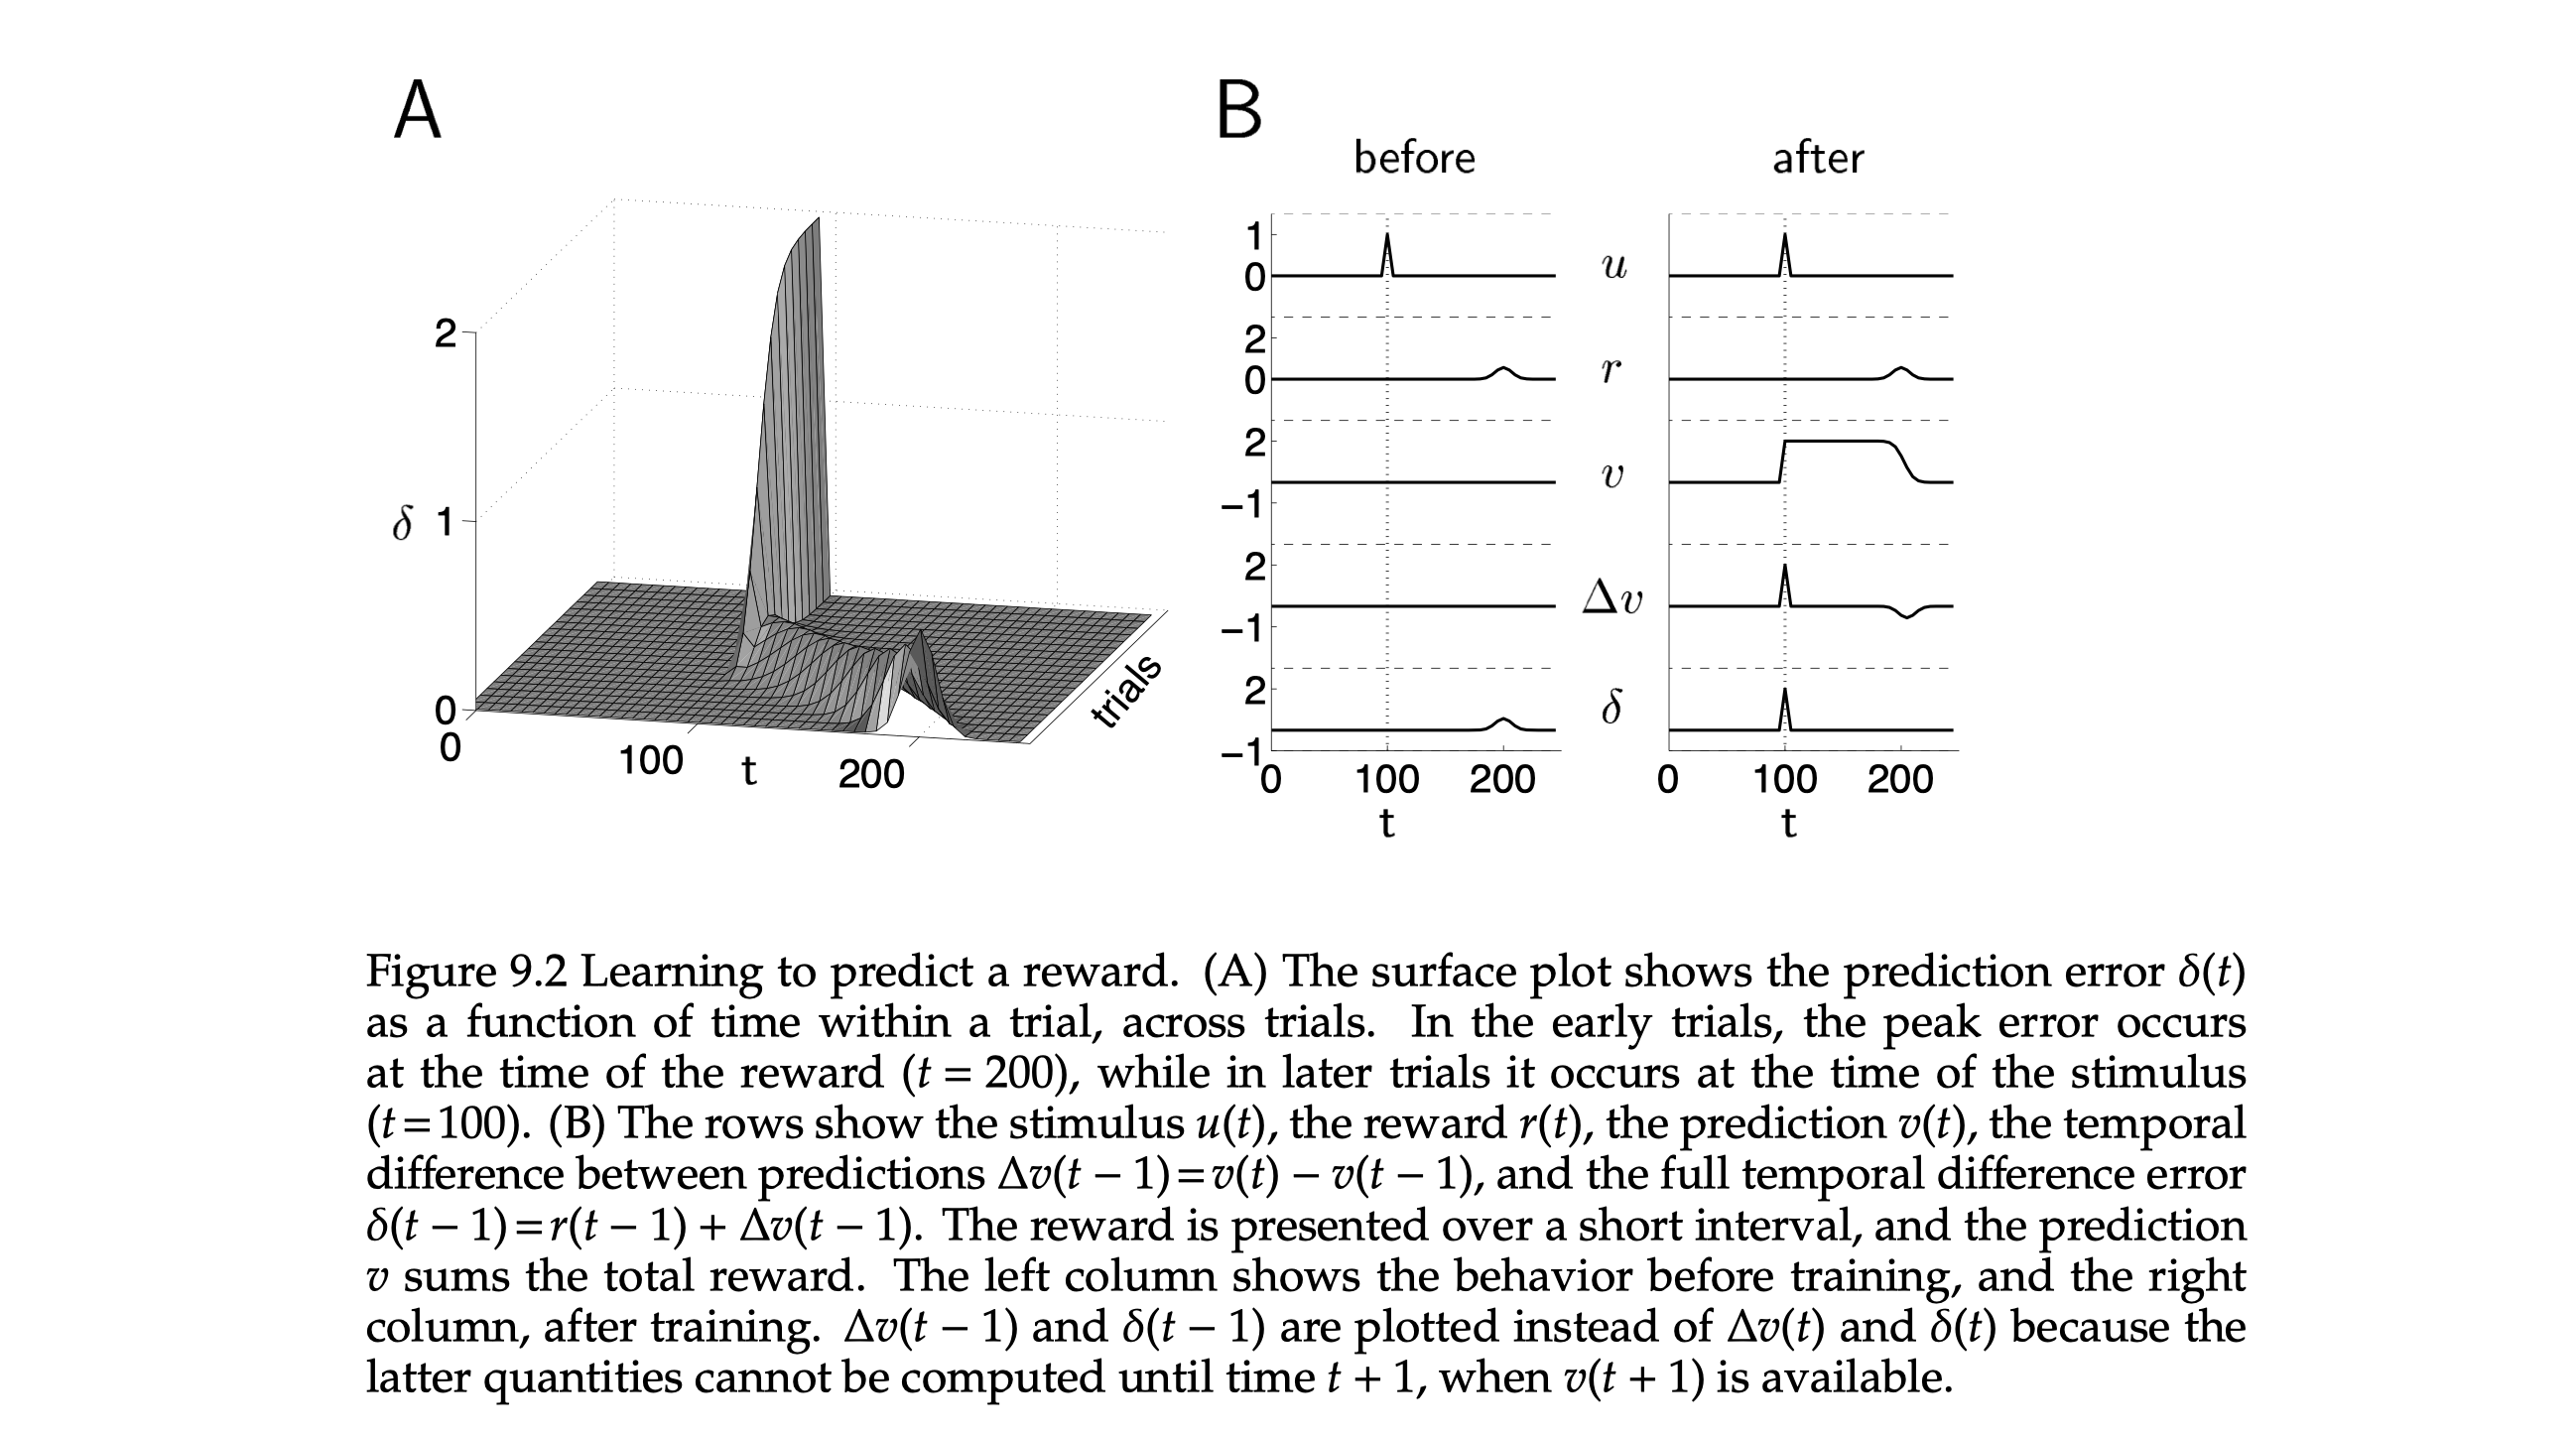

define the function for the five 2D plot

In [ ]:


def five_plot(u, r, values, trail, td_errors):

          last_trial_u = u
          last_trial_r = r
          last_trial_v = values[-1]
          last_trial_delta_v = np.diff(last_trial_v, prepend=0)  # prepend=0 to maintain the array length
          last_trial_td_error = td_errors[-1]

          fig, axes = plt.subplots(5, 1, figsize=(7, 10))

          # Plot stimulus over time
          axes[0].plot(last_trial_u, label='Stimulus (u)')
          axes[0].set_title(f'Stimulus over Time at trial={trial}')
          axes[0].set_xlabel('Time')
          axes[0].set_ylabel('Stimulus')
          axes[0].legend()

          # Plot reward over time
          axes[1].plot(last_trial_r, label='Reward (r)')
          axes[1].set_title(f'Reward over Time at trial={trial}')
          axes[1].set_xlabel('Time')
          axes[1].set_ylabel('Reward')
          axes[1].legend()

          # Plot predicted value over time
          axes[2].plot(last_trial_v, label='v')
          axes[2].set_title(f'Predicted Value over Time at trial={trial}')
          axes[2].set_xlabel('Time')
          axes[2].set_ylabel('V')
          axes[2].legend()

          # Plot change in predicted value over time
          axes[3].plot(last_trial_delta_v, label='Δv')
          axes[3].set_title(f'Change in Predicted Value over Time at trial={trial}')
          axes[3].set_xlabel('Time')
          axes[3].legend()

          # Plot TD error over time
          axes[4].plot(last_trial_td_error, label='TD Error (δ)')
          axes[4].set_title(f'TD Error over Time at trial={trial}')
          axes[4].set_xlabel('Time')
          axes[4].set_ylabel('TD Error')
          axes[4].legend()

          plt.tight_layout()
          plt.show()


simulation loop with different learning rate

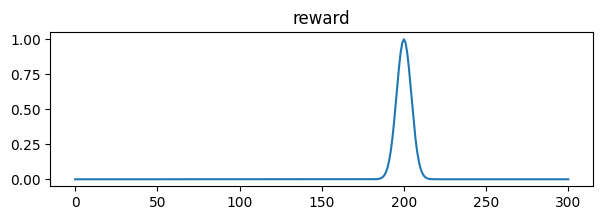

In [ ]:
def gaussian(t, mean, variance):
    return np.exp(-0.5 * ((t - mean) ** 2) / variance)

def create_gaussian_reward(time_steps, reward_time, variance, threshold_distance=20):
    r = np.zeros(time_steps)
    for t in range(time_steps):
        if abs(t - reward_time) <= threshold_distance:
            r[t] = gaussian(t, reward_time, variance)
    return r


r = create_gaussian_reward(time_steps=301, reward_time=200, variance=20, threshold_distance=20)
plt.figure(figsize=(7,2))
plt.title('reward')
plt.plot(r)





## lr = 0.5

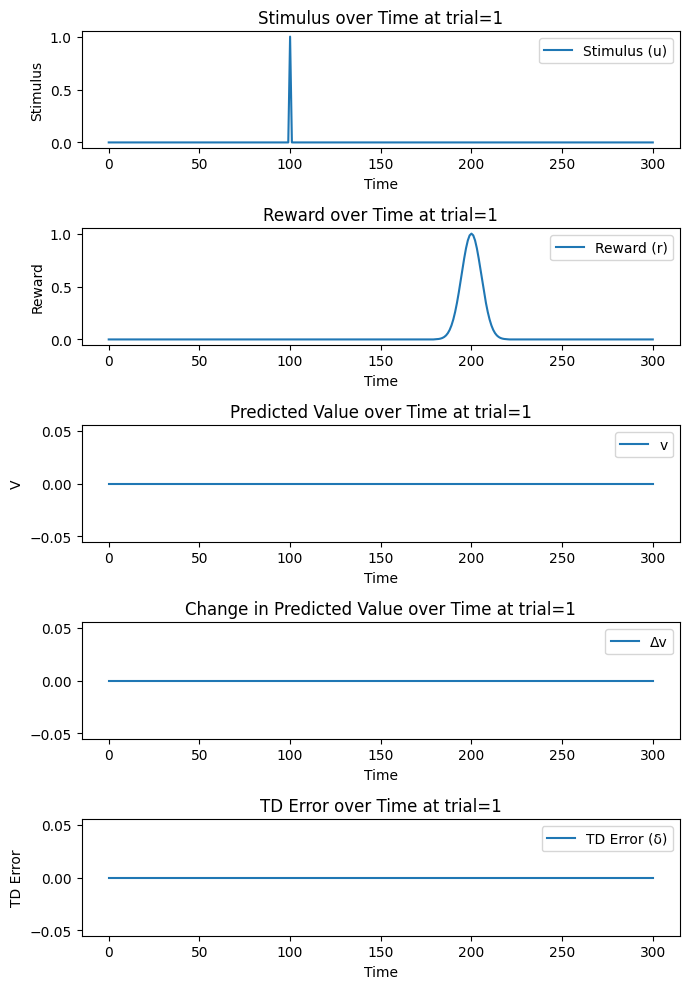

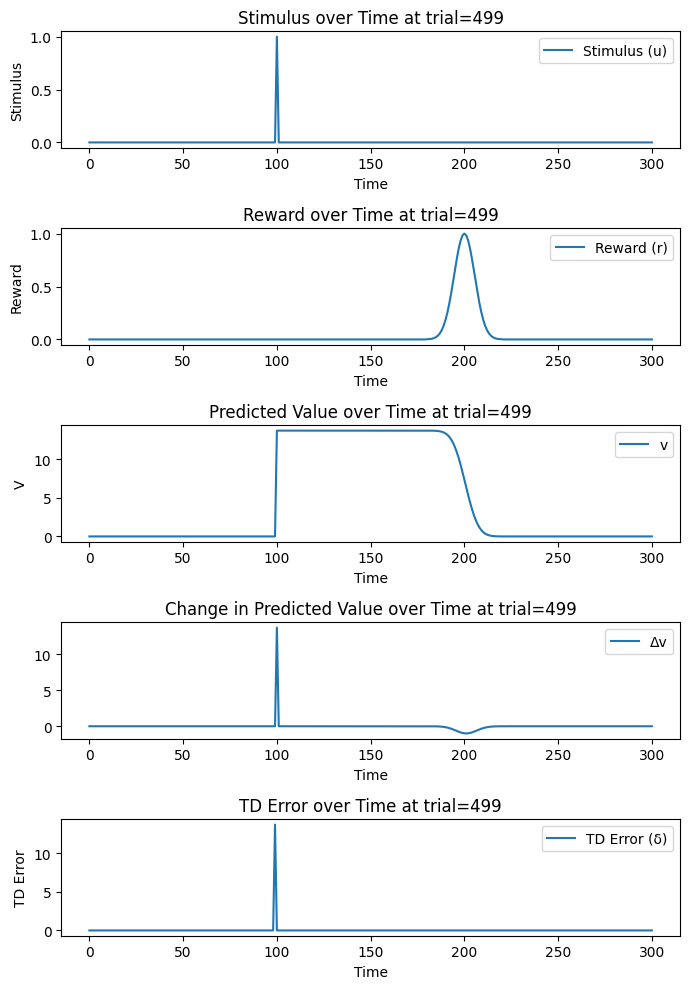

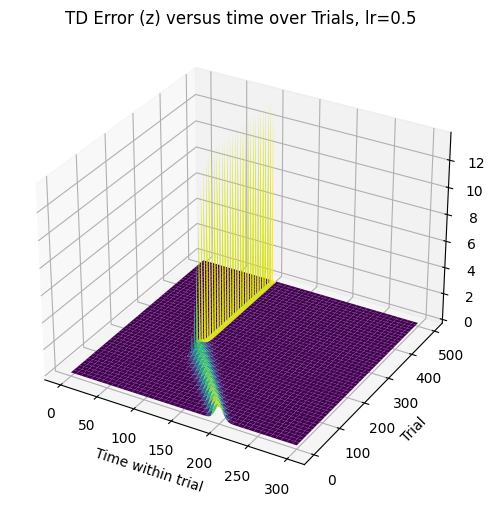

In [ ]:

num_trials = 500
time_steps = 301 # for each trial
learning_rate = 0.5


w = np.zeros(time_steps)  # w(tau)
values = np.zeros((num_trials, time_steps))  # v(t)
td_errors = np.zeros((num_trials, time_steps))  #  δ(t)
u = np.zeros(time_steps)  # stimulus

stimulus_time = 100

u[stimulus_time] = 1


r = create_gaussian_reward(time_steps, reward_time=200, variance=30, threshold_distance=20)

for trial in range(num_trials):

    for t in range(1, time_steps):

        v_t = sum([w[tau] * u[t - tau] for tau in range(t)])
        if t < time_steps-1:
           v_t_plus_1 = sum([w[tau] * u[t+1 - tau] for tau in range(t+1)])
        else:
          v_t_plus_1 = v_t # exclude last timestep


        # Calculate the TD error
        if t < time_steps - 1:
            td_error = r[t] + v_t_plus_1 - v_t
        else:
            td_error = r[t] - v_t  # No future prediction at the last time step

        td_errors[trial, t] = td_error

        # Update the weights using the TD error
        for tau in range(t):
            w[tau] += learning_rate * td_error * u[t - tau]

        values[trial, t] = v_t

    if trial == 1 or trial == 499:
          five_plot(u, r, values, trial, td_errors)
          print('')
          print('')

T, S = np.meshgrid(np.arange(time_steps), np.arange(num_trials))
fig = plt.figure(figsize=(13, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(T, S, td_errors,cmap='viridis')
ax.set_xlabel('Time within trial')
ax.set_ylabel('Trial')
ax.set_title(f'TD Error (z) versus time over Trials, lr={learning_rate}')
plt.show()




## lr = 0.25

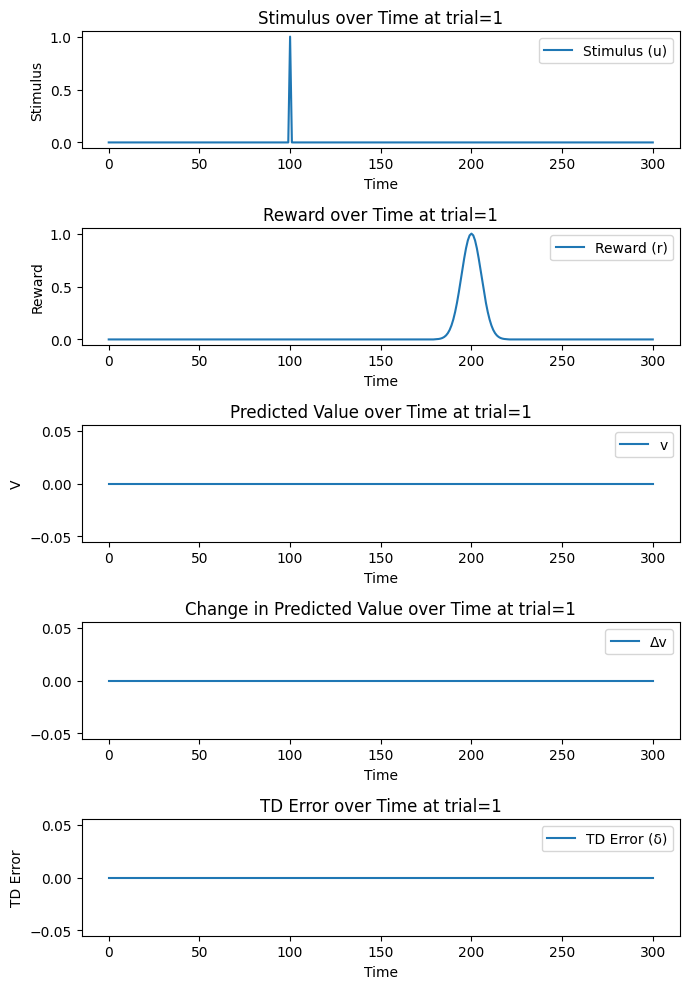

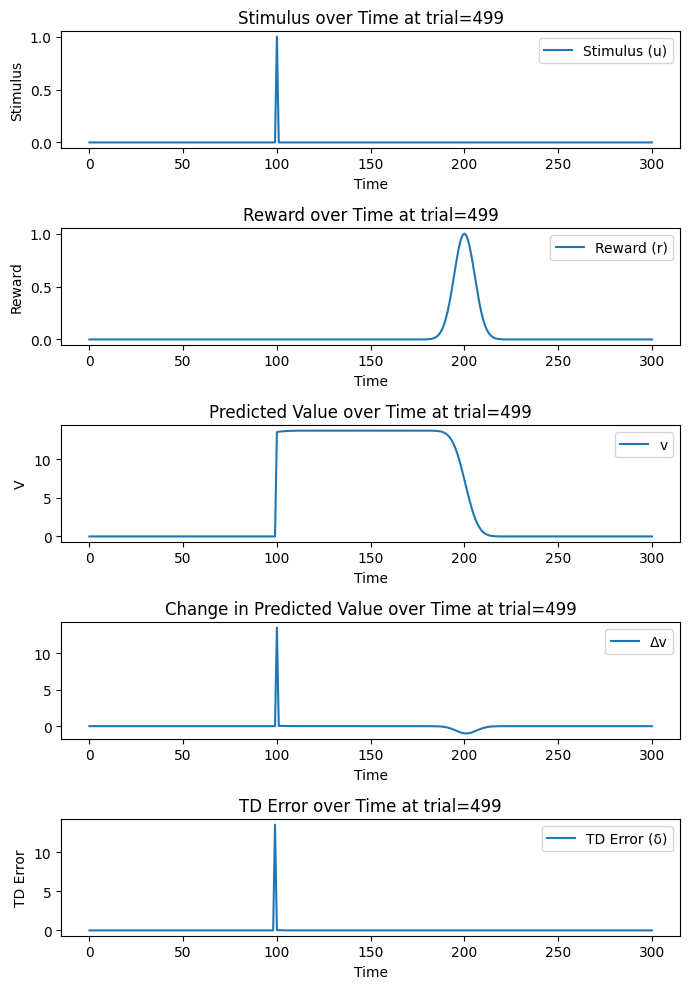

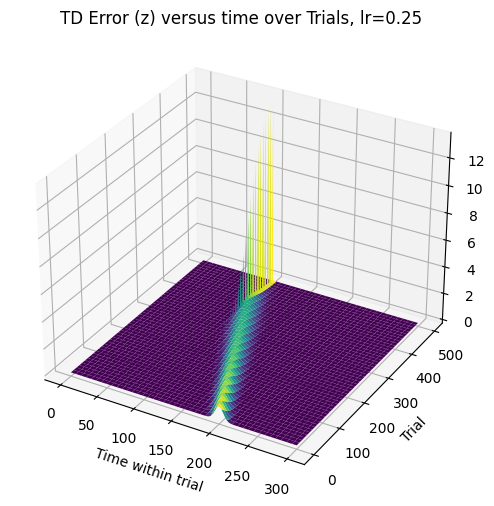

In [ ]:

learning_rate = 0.25


w = np.zeros(time_steps)  # w(tau)
values = np.zeros((num_trials, time_steps))  # v(t)
td_errors = np.zeros((num_trials, time_steps))  #  δ(t)
u = np.zeros(time_steps)  # stimulus

stimulus_time = 100

u[stimulus_time] = 1


r = create_gaussian_reward(time_steps, reward_time=200, variance=30, threshold_distance=20)

for trial in range(num_trials):

    for t in range(1, time_steps):

        v_t = sum([w[tau] * u[t - tau] for tau in range(t)])
        if t < time_steps-1:
           v_t_plus_1 = sum([w[tau] * u[t+1 - tau] for tau in range(t+1)])
        else:
          v_t_plus_1 = v_t # exclude last timestep


        # Calculate the TD error
        if t < time_steps - 1:
            td_error = r[t] + v_t_plus_1 - v_t
        else:
            td_error = r[t] - v_t  # No future prediction at the last time step

        td_errors[trial, t] = td_error

        # Update the weights using the TD error
        for tau in range(t):
            w[tau] += learning_rate * td_error * u[t - tau]

        values[trial, t] = v_t

    if trial == 1 or trial == 499:
          five_plot(u, r, values, trial, td_errors)
          print('')
          print('')

T, S = np.meshgrid(np.arange(time_steps), np.arange(num_trials))
fig = plt.figure(figsize=(13, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(T, S, td_errors,cmap='viridis')
ax.set_xlabel('Time within trial')
ax.set_ylabel('Trial')
ax.set_title(f'TD Error (z) versus time over Trials, lr={learning_rate}')
plt.show()




## Multiple Reward 2S2R

In [ ]:
def multi_gaussian_reward(time_steps, reward_times, variances, threshold_distance=20):
    r = np.zeros(time_steps)
    for reward_time, variance in zip(reward_times, variances):
        for t in range(time_steps):
            if abs(t - reward_time) <= threshold_distance:
                r[t] += gaussian(t, reward_time, variance)
    return r

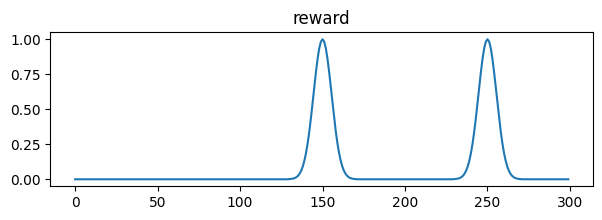

In [ ]:

num_trials = 300
time_steps = 501
learning_rate = 0.5
stimulus_time = 100
reward_times = [150, 250]  # Multiple reward times
variances = [30, 30]  # Corresponding variances for each reward


r = multi_gaussian_reward(time_steps=num_trials, reward_times=reward_times, variances=variances, threshold_distance=20)
plt.figure(figsize=(7,2))
plt.title('reward')
plt.plot(r)




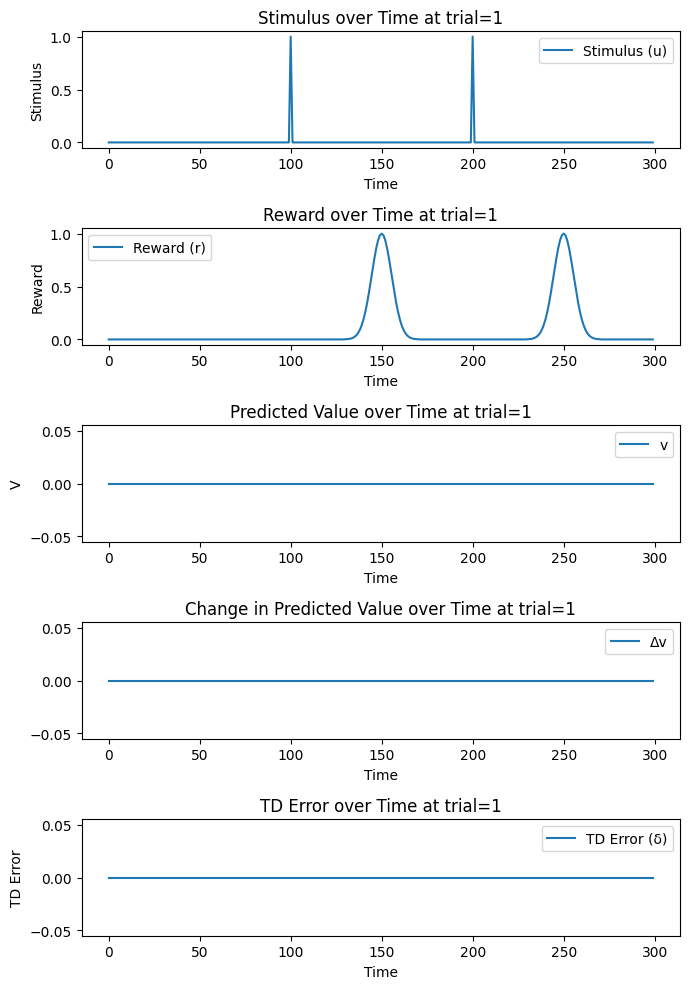

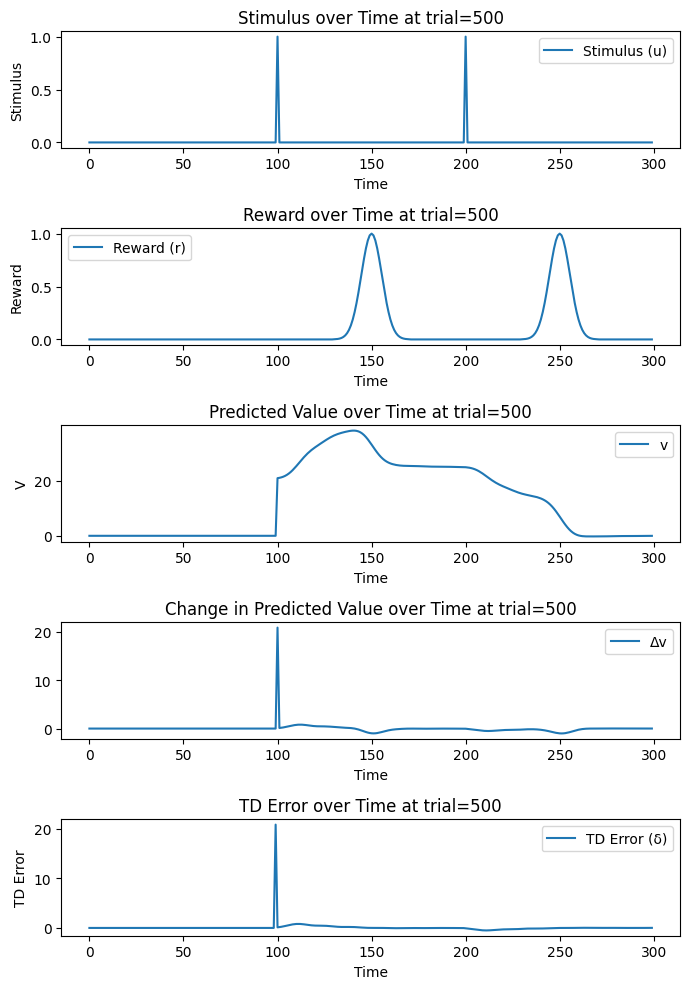

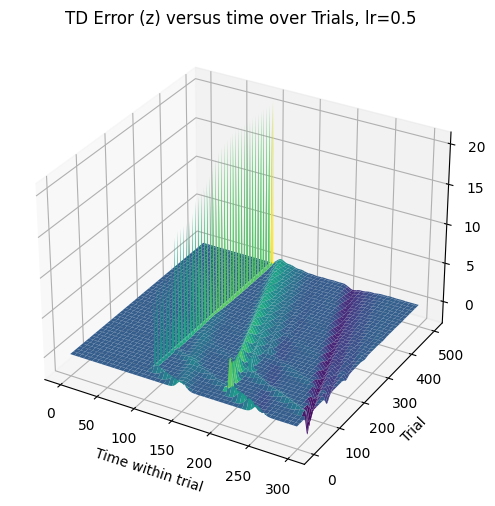

In [ ]:

num_trials = 501
time_steps = 300 # for each trial
learning_rate = 0.5


w = np.zeros(time_steps)  # w(tau)
values = np.zeros((num_trials, time_steps))  # v(t)
td_errors = np.zeros((num_trials, time_steps))  #  δ(t)
u = np.zeros(time_steps)  # stimulus

stimulus_time = 100
u[stimulus_time] = 1
stimulus_time = 200
u[stimulus_time] = 1



for trial in range(num_trials):

    for t in range(1, time_steps):

        v_t = sum([w[tau] * u[t - tau] for tau in range(t)])
        if t < time_steps-1:
           v_t_plus_1 = sum([w[tau] * u[t+1 - tau] for tau in range(t+1)])
        else:
          v_t_plus_1 = v_t # exclude last timestep


        # Calculate the TD error
        if t < time_steps - 1:
            td_error = r[t] + v_t_plus_1 - v_t
        else:
            td_error = r[t] - v_t  # No future prediction at the last time step

        td_errors[trial, t] = td_error

        # Update the weights using the TD error
        for tau in range(t):
            w[tau] += learning_rate * td_error * u[t - tau]

        values[trial, t] = v_t

    if trial == 1 or trial == 500:
          five_plot(u, r, values, trial, td_errors)
          print('')
          print('')

T, S = np.meshgrid(np.arange(time_steps), np.arange(num_trials))
fig = plt.figure(figsize=(13, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(T, S, td_errors,cmap='viridis')
ax.set_xlabel('Time within trial')
ax.set_ylabel('Trial')
ax.set_title(f'TD Error (z) versus time over Trials, lr={learning_rate}')
plt.show()



## Multiple Reward 1S2R

In [ ]:
def multi_gaussian_reward(time_steps, reward_times, variances, threshold_distance=20):
    r = np.zeros(time_steps)
    for reward_time, variance in zip(reward_times, variances):
        for t in range(time_steps):
            if abs(t - reward_time) <= threshold_distance:
                r[t] += gaussian(t, reward_time, variance)
    return r

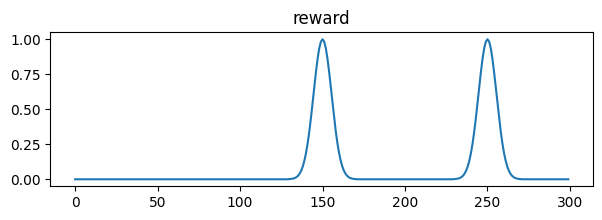

In [ ]:

num_trials = 300
time_steps = 501
learning_rate = 0.5
stimulus_time = 100
reward_times = [150, 250]  # Multiple reward times
variances = [30, 30]  # Corresponding variances for each reward


r = multi_gaussian_reward(time_steps=num_trials, reward_times=reward_times, variances=variances, threshold_distance=20)
plt.figure(figsize=(7,2))
plt.title('reward')
plt.plot(r)




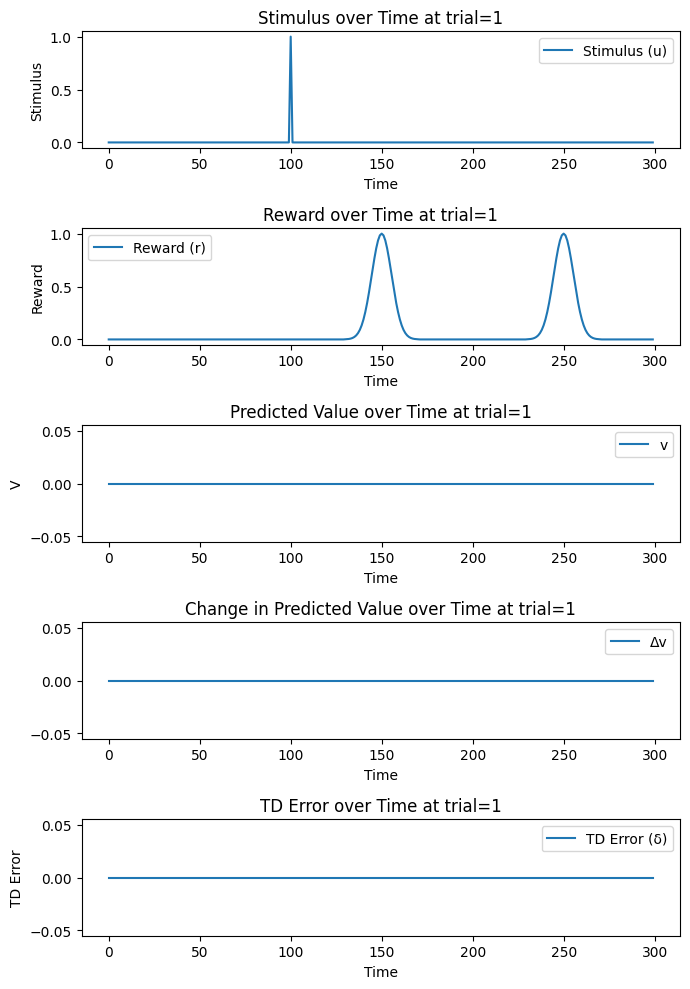

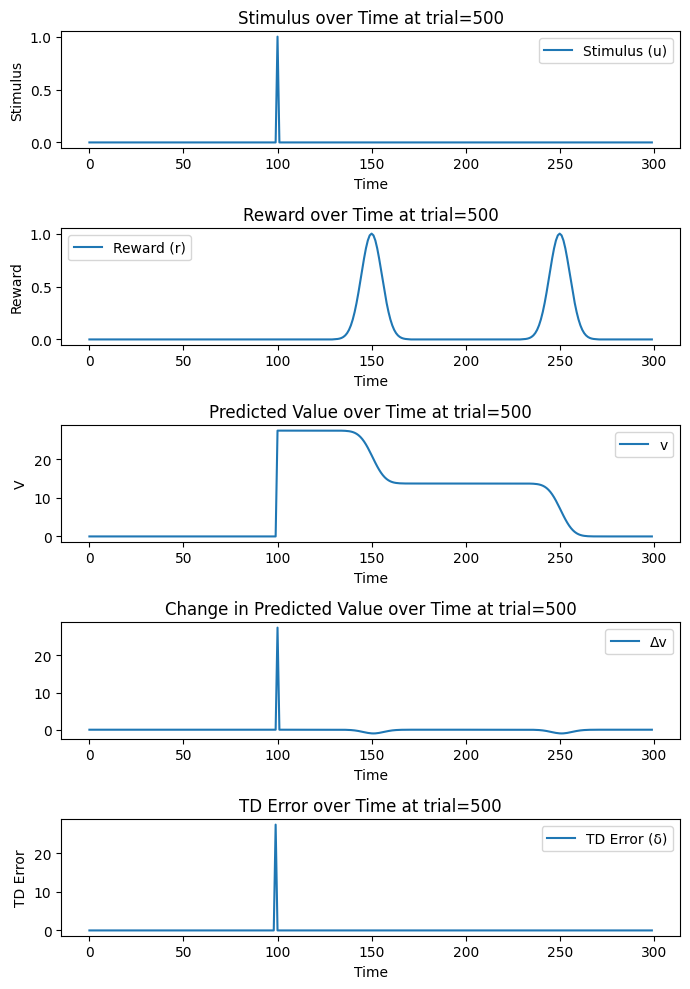

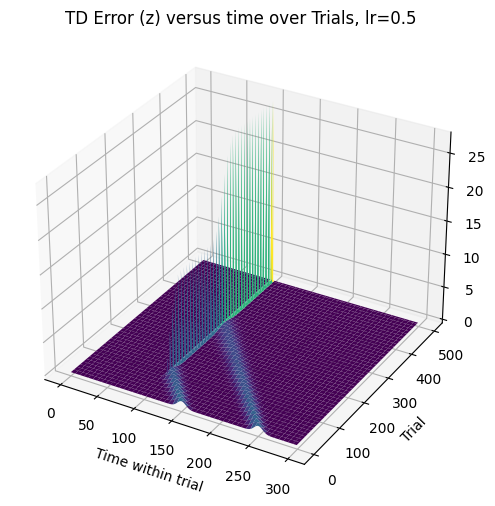

In [ ]:

num_trials = 501
time_steps = 300 # for each trial
learning_rate = 0.5


w = np.zeros(time_steps)  # w(tau)
values = np.zeros((num_trials, time_steps))  # v(t)
td_errors = np.zeros((num_trials, time_steps))  #  δ(t)
u = np.zeros(time_steps)  # stimulus

stimulus_time = 100
u[stimulus_time] = 1




for trial in range(num_trials):

    for t in range(1, time_steps):

        v_t = sum([w[tau] * u[t - tau] for tau in range(t)])
        if t < time_steps-1:
           v_t_plus_1 = sum([w[tau] * u[t+1 - tau] for tau in range(t+1)])
        else:
          v_t_plus_1 = v_t # exclude last timestep


        # Calculate the TD error
        if t < time_steps - 1:
            td_error = r[t] + v_t_plus_1 - v_t
        else:
            td_error = r[t] - v_t  # No future prediction at the last time step

        td_errors[trial, t] = td_error

        # Update the weights using the TD error
        for tau in range(t):
            w[tau] += learning_rate * td_error * u[t - tau]

        values[trial, t] = v_t

    if trial == 1 or trial == 500:
          five_plot(u, r, values, trial, td_errors)
          print('')
          print('')

T, S = np.meshgrid(np.arange(time_steps), np.arange(num_trials))
fig = plt.figure(figsize=(13, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(T, S, td_errors,cmap='viridis')
ax.set_xlabel('Time within trial')
ax.set_ylabel('Trial')
ax.set_title(f'TD Error (z) versus time over Trials, lr={learning_rate}')
plt.show()



## Stochastic Reward (p=0.8 reward)

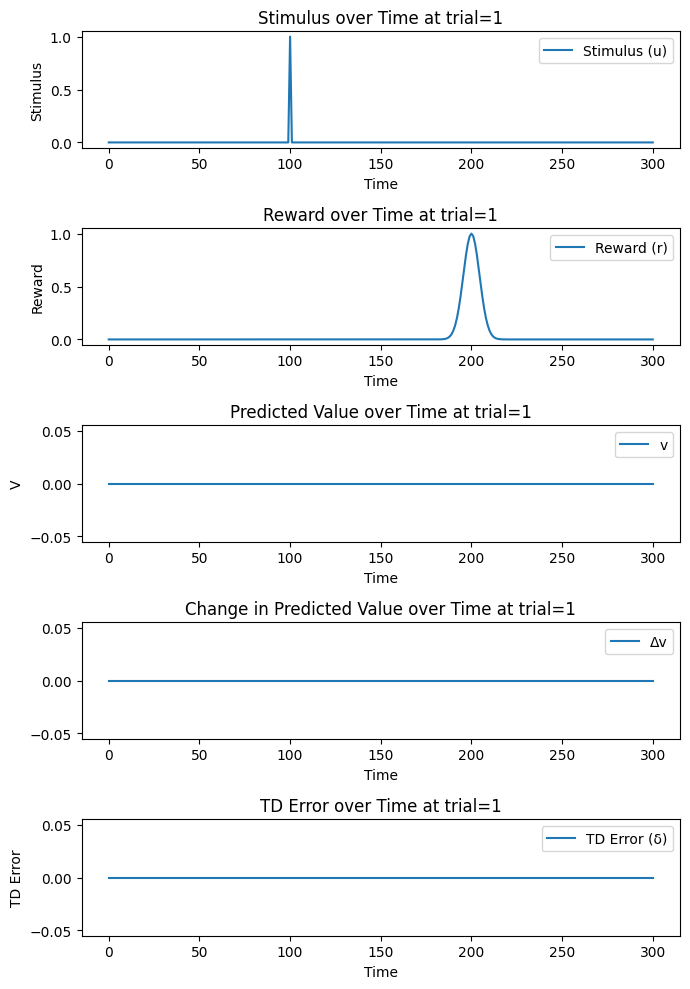

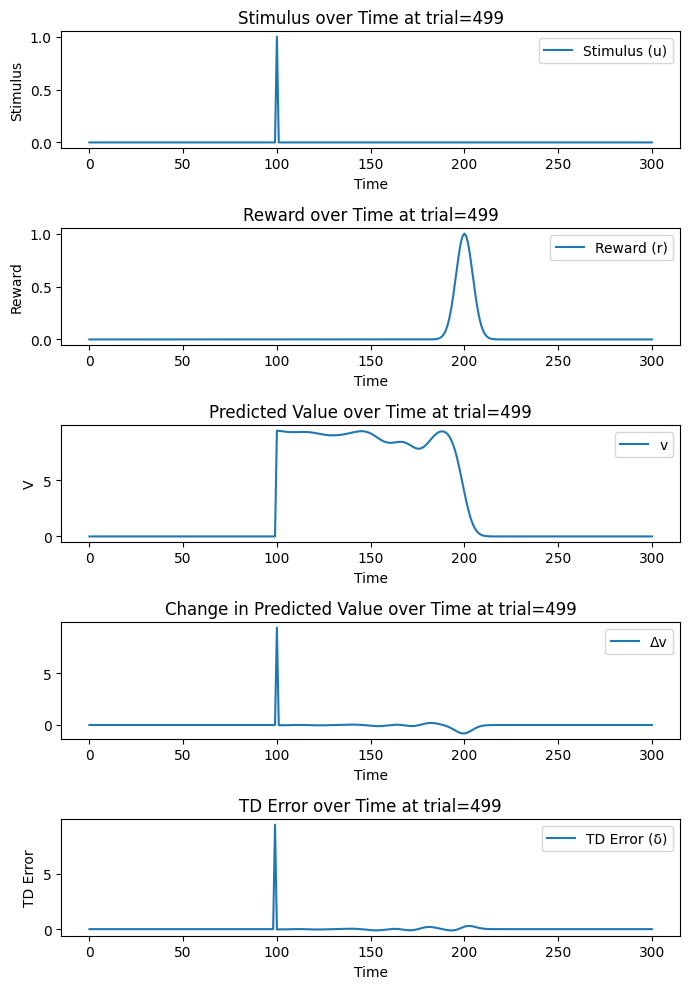

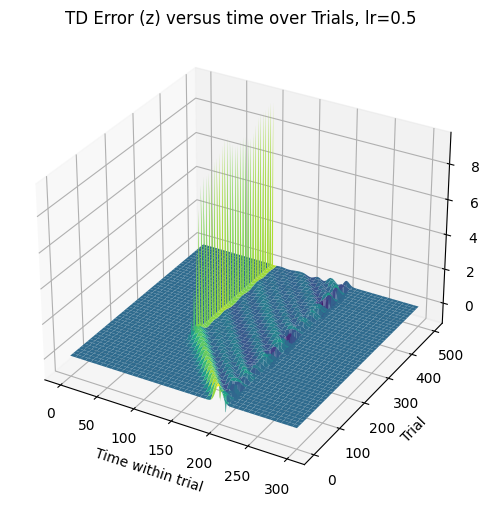

In [ ]:



num_trials = 500
time_steps = 301 # for each trial
learning_rate = 0.5


w = np.zeros(time_steps)  # w(tau)
values = np.zeros((num_trials, time_steps))  # v(t)
td_errors = np.zeros((num_trials, time_steps))  #  δ(t)
u = np.zeros(time_steps)  # stimulus

stimulus_time = 100

u[stimulus_time] = 1



for trial in range(num_trials):

    thres = np.random.uniform(0.0, 1.0)
    if thres < 0.2:


        r = np.zeros(time_steps)
    else:
        r = create_gaussian_reward(time_steps=301, reward_time=200, variance=20, threshold_distance=20)



    for t in range(1, time_steps):

        v_t = sum([w[tau] * u[t - tau] for tau in range(t)])
        if t < time_steps-1:
           v_t_plus_1 = sum([w[tau] * u[t+1 - tau] for tau in range(t+1)])
        else:
          v_t_plus_1 = v_t # exclude last timestep


        # Calculate the TD error
        if t < time_steps - 1:
            td_error = r[t] + v_t_plus_1 - v_t
        else:
            td_error = r[t] - v_t  # No future prediction at the last time step

        td_errors[trial, t] = td_error

        # Update the weights using the TD error
        for tau in range(t):
            w[tau] += learning_rate * td_error * u[t - tau]

        values[trial, t] = v_t

    if trial == 1 or trial == 499:
          five_plot(u, r, values, trial, td_errors)
          print('')
          print('')

T, S = np.meshgrid(np.arange(time_steps), np.arange(num_trials))
fig = plt.figure(figsize=(13, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(T, S, td_errors,cmap='viridis')
ax.set_xlabel('Time within trial')
ax.set_ylabel('Trial')
ax.set_title(f'TD Error (z) versus time over Trials, lr={learning_rate}')
plt.show()





## Stochastic Reward (p=0.3 reward)

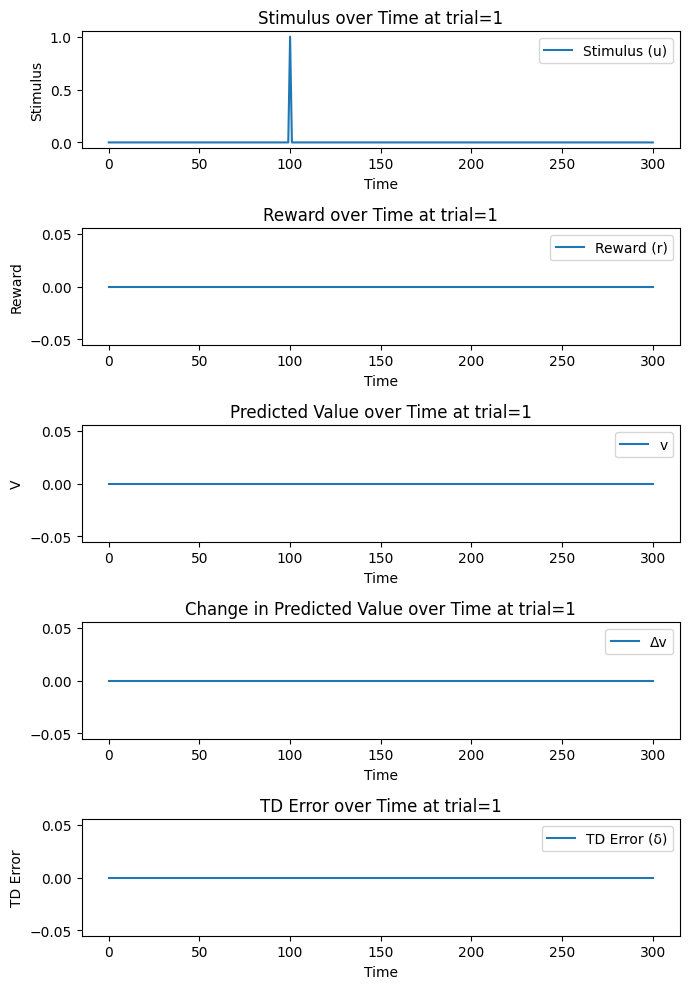

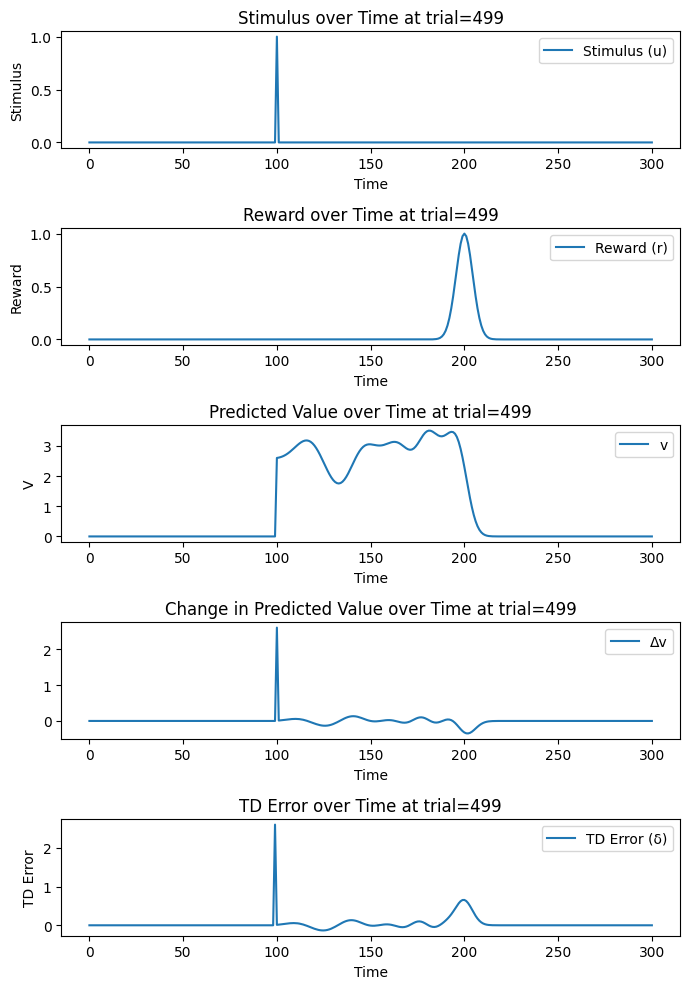

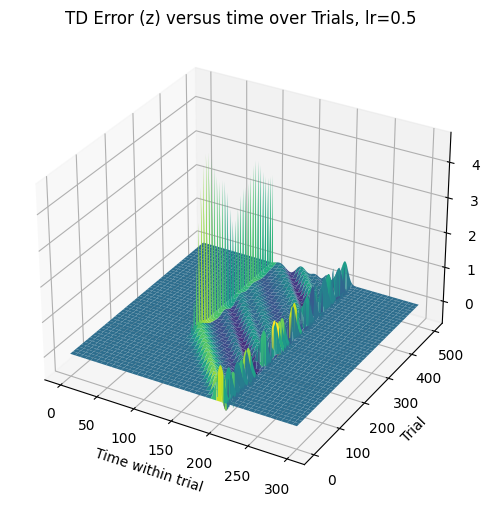

In [ ]:



num_trials = 500
time_steps = 301 # for each trial
learning_rate = 0.5


w = np.zeros(time_steps)  # w(tau)
values = np.zeros((num_trials, time_steps))  # v(t)
td_errors = np.zeros((num_trials, time_steps))  #  δ(t)
u = np.zeros(time_steps)  # stimulus

stimulus_time = 100

u[stimulus_time] = 1



for trial in range(num_trials):

    thres = np.random.uniform(0.0, 1.0)
    if thres < 0.7:


        r = np.zeros(time_steps)
    else:
        r = create_gaussian_reward(time_steps=301, reward_time=200, variance=20, threshold_distance=20)



    for t in range(1, time_steps):

        v_t = sum([w[tau] * u[t - tau] for tau in range(t)])
        if t < time_steps-1:
           v_t_plus_1 = sum([w[tau] * u[t+1 - tau] for tau in range(t+1)])
        else:
          v_t_plus_1 = v_t # exclude last timestep


        # Calculate the TD error
        if t < time_steps - 1:
            td_error = r[t] + v_t_plus_1 - v_t
        else:
            td_error = r[t] - v_t  # No future prediction at the last time step

        td_errors[trial, t] = td_error

        # Update the weights using the TD error
        for tau in range(t):
            w[tau] += learning_rate * td_error * u[t - tau]

        values[trial, t] = v_t

    if trial == 1 or trial == 499:
          five_plot(u, r, values, trial, td_errors)
          print('')
          print('')

T, S = np.meshgrid(np.arange(time_steps), np.arange(num_trials))
fig = plt.figure(figsize=(13, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(T, S, td_errors,cmap='viridis')
ax.set_xlabel('Time within trial')
ax.set_ylabel('Trial')
ax.set_title(f'TD Error (z) versus time over Trials, lr={learning_rate}')
plt.show()



